In [1]:
import pandas as pd
import numpy as np


# Carregando e processando os dados

In [2]:
df_tv_shows = pd.read_csv('tvshowsfinals.csv')
df_tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2006 non-null   object 
 1   changed_network           2006 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                2006 non-null   object 
 4   metacritc_last_info_year  2006 non-null   int64  
 5   tvtime_followers          2006 non-null   float64
 6   tvtime_rate               2006 non-null   float64
 7   no_seasons                1337 non-null   float64
 8   eps_duration              2006 non-null   object 
 9   age_rating                828 non-null    object 
 10  imdb_rate                 2006 non-null   float64
 11  rotten_tomatoes_rate      2006 non-null   float64
 12  released_year             945 non-null    float64
 13  awards_won                2006 non-null   float64
 14  awards_n

## Removendo dados sem status

In [3]:
df_tv_shows_clean = df_tv_shows[~df_tv_shows['status'].isnull()] 
# df_tv_shows_clean = df_tv_shows[~df_tv_shows['no_seasons'].isnull()] 
df_tv_shows_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1342 non-null   object 
 1   changed_network           1342 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                1342 non-null   object 
 4   metacritc_last_info_year  1342 non-null   int64  
 5   tvtime_followers          1342 non-null   float64
 6   tvtime_rate               1342 non-null   float64
 7   no_seasons                1046 non-null   float64
 8   eps_duration              1342 non-null   object 
 9   age_rating                643 non-null    object 
 10  imdb_rate                 1342 non-null   float64
 11  rotten_tomatoes_rate      1342 non-null   float64
 12  released_year             689 non-null    float64
 13  awards_won                1342 non-null   float64
 14  awards_n

## Computando dummies para dados categoricos

In [4]:
df_eps_duration_dummies = pd.get_dummies(df_tv_shows_clean['eps_duration'], prefix='duration')
df_network_dummies = pd.get_dummies(df_tv_shows_clean['tv_network'])
print(df_eps_duration_dummies.head())
df_network_dummies.head()

   duration_long  duration_normal  duration_short
0              0                1               0
2              0                1               0
5              0                1               0
6              0                1               0
7              0                1               0


,ABC,AMAZON,AMC,APPLE,CBS,DISNEY,FOX,FREEF,FX,HBO,...,SHOWTIME,STRZ,SYFY,TBS,THE CW,TNT,TVL,USA,YHOO,YT
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Juntando dummies com os dados

In [5]:
df_tv_shows_final = pd.concat([df_tv_shows_clean, df_eps_duration_dummies, df_network_dummies], axis=1)
df_tv_shows_final.drop(columns=['name', 'age_rating', 'released_year', 'metacritc_last_info_year', 'eps_duration', 'tv_network', 'no_seasons'], inplace=True)
df_tv_shows_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   changed_network       1342 non-null   float64
 1   status                1342 non-null   object 
 2   tvtime_followers      1342 non-null   float64
 3   tvtime_rate           1342 non-null   float64
 4   imdb_rate             1342 non-null   float64
 5   rotten_tomatoes_rate  1342 non-null   float64
 6   awards_won            1342 non-null   float64
 7   awards_nominated      1342 non-null   float64
 8   duration_long         1342 non-null   uint8  
 9   duration_normal       1342 non-null   uint8  
 10  duration_short        1342 non-null   uint8  
 11  ABC                   1342 non-null   uint8  
 12  AMAZON                1342 non-null   uint8  
 13  AMC                   1342 non-null   uint8  
 14  APPLE                 1342 non-null   uint8  
 15  CBS                  

In [6]:
df_tv_shows_final.loc[df_tv_shows_final.status == 'renewed_but', 'status'] = 'not_canceled'
df_tv_shows_final.loc[df_tv_shows_final.status == 'renewed', 'status'] = 'not_canceled'
df_tv_shows_final.loc[df_tv_shows_final.status == 'end', 'status'] = 'not_canceled'

In [7]:
canceled_sample = df_tv_shows_final[df_tv_shows_final.status == 'canceled']##.sample(frac=0.5)
not_canceled = df_tv_shows_final[(df_tv_shows_final.status == 'not_canceled')]
tv_shows_canceled_sample = pd.concat([canceled_sample, not_canceled])

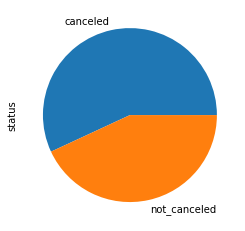

In [8]:
tv_shows_canceled_sample.status.value_counts().plot(kind='pie')

In [9]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import optuna
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [10]:
x_tvshows = tv_shows_canceled_sample.drop('status', axis=1)
y_tvshows = tv_shows_canceled_sample['status']
Xtrain, Xtest, ytrain, ytest = train_test_split(x_tvshows, y_tvshows, random_state=1)
# tv_shows_canceled_sample.info()

In [11]:
def show_confusion_matrix (model):
    model.fit(Xtrain, ytrain)
    ypred_train = model.predict(Xtrain)
    y_model = model.predict(Xtest)

    print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
    print("ACC TEST:" + str(accuracy_score(ytest, y_model)))

    labels = ['not_canceled', 'canceled']
    mat = confusion_matrix(ytest, y_model, labels=labels)
    sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=labels, yticklabels=labels)
    # mat = confusion_matrix(ytest, y_model, labels=['renewed', 'canceled', 'end'])
    # sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value')


In [12]:

from urllib.parse import urlparse

import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

## KNN

In [13]:
with mlflow.start_run():
    def objective(trial):
        # hyperparameter setting
        n_neighbors = trial.suggest_int('n_neighbors', 1, 200)
        
        # model training and evaluation
        model =  KNeighborsClassifier( n_neighbors=n_neighbors)
        model.fit(Xtrain, ytrain)
        y_pred = model.predict(Xtest)
        acc = accuracy_score(ytest, y_pred)

        # output: evaluation score
        return acc

    study_knn = optuna.create_study(direction='maximize')
    study_knn.optimize(objective, n_trials=20)

    mlflow.log_param('n_neighbors', study_knn.best_params['n_neighbors'])
    mlflow.log_metric('acc', study_knn.best_value)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model registry does not work with file store
    if tracking_url_type_store != "file":

        # Register the model
        # There are other ways to use the Model Registry, which depends on the use case,
        # please refer to the doc for more information:
        # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        mlflow.sklearn.log_model(model, "model", registered_model_name="KNN")
    else:
        mlflow.sklearn.log_model(model, "model")

[I 2020-11-15 22:40:08,675] A new study created in memory with name: no-name-d44b3f4f-d2aa-4002-b4fb-f4235e2fbda8
[I 2020-11-15 22:40:08,738] Trial 0 finished with value: 0.7080745341614907 and parameters: {'n_neighbors': 59}. Best is trial 0 with value: 0.7080745341614907.
[I 2020-11-15 22:40:08,812] Trial 1 finished with value: 0.6863354037267081 and parameters: {'n_neighbors': 167}. Best is trial 0 with value: 0.7080745341614907.
[I 2020-11-15 22:40:08,883] Trial 2 finished with value: 0.6770186335403726 and parameters: {'n_neighbors': 197}. Best is trial 0 with value: 0.7080745341614907.
[I 2020-11-15 22:40:08,938] Trial 3 finished with value: 0.6987577639751553 and parameters: {'n_neighbors': 151}. Best is trial 0 with value: 0.7080745341614907.
[I 2020-11-15 22:40:08,983] Trial 4 finished with value: 0.6863354037267081 and parameters: {'n_neighbors': 181}. Best is trial 0 with value: 0.7080745341614907.
[I 2020-11-15 22:40:09,014] Trial 5 finished with value: 0.6801242236024845 a

NameError: name 'model' is not defined

ACC TRAINING:0.6780538302277432
ACC TEST:0.717391304347826


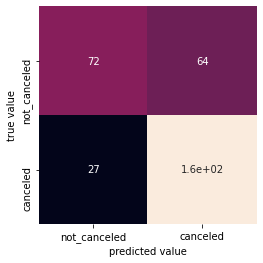

In [38]:
show_confusion_matrix(KNeighborsClassifier(**study_knn.best_params))

## Random Forest

In [22]:
classifier_rf = RandomForestClassifier(random_state=200,
                           max_depth=10,
                           n_estimators=50)
scores_rf = cross_val_score(classifier_rf, x_tvshows, y_tvshows,
                            scoring='accuracy', cv=5)

print(scores_rf.mean())

0.7321449039302628


In [37]:
with mlflow.start_run():
    def objective(trial):
        # hyperparameter setting
        max_depth = trial.suggest_int('max_depth', 3, 1000)
        random_state = trial.suggest_int('random_state', 0, 1000)
        n_estimators = trial.suggest_int('n_estimators', 1, 200)
        
        # model training and evaluation
        model =  RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators)
        model.fit(Xtrain, ytrain)
        y_pred = model.predict(Xtest)
        acc = accuracy_score(ytest, y_pred)

        # output: evaluation score
        return acc

    study_randomforest = optuna.create_study(direction='maximize')
    study_randomforest.optimize(objective, n_trials=20)

    mlflow.log_param('max_depth', study_randomforest.best_params['max_depth'])
    mlflow.log_param('n_estimators', study_randomforest.best_params['n_estimators'])
    mlflow.log_metric('acc',study_randomforest.best_value)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model registry does not work with file store
    if tracking_url_type_store != "file":

        # Register the model
        # There are other ways to use the Model Registry, which depends on the use case,
        # please refer to the doc for more information:
        # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        mlflow.sklearn.log_model(model, "model", registered_model_name="RandomForest")
    else:
        mlflow.sklearn.log_model(model, "model")

[I 2020-11-15 22:37:40,455] A new study created in memory with name: no-name-fbeedbe1-57c8-4c40-b898-05fa242be26a
[I 2020-11-15 22:37:40,696] Trial 0 finished with value: 0.7639751552795031 and parameters: {'max_depth': 519, 'random_state': 253, 'n_estimators': 99}. Best is trial 0 with value: 0.7639751552795031.
[I 2020-11-15 22:37:40,924] Trial 1 finished with value: 0.7732919254658385 and parameters: {'max_depth': 294, 'random_state': 394, 'n_estimators': 116}. Best is trial 1 with value: 0.7732919254658385.
[I 2020-11-15 22:37:41,255] Trial 2 finished with value: 0.7639751552795031 and parameters: {'max_depth': 433, 'random_state': 424, 'n_estimators': 155}. Best is trial 1 with value: 0.7732919254658385.
[I 2020-11-15 22:37:41,385] Trial 3 finished with value: 0.7515527950310559 and parameters: {'max_depth': 712, 'random_state': 983, 'n_estimators': 59}. Best is trial 1 with value: 0.7732919254658385.
[I 2020-11-15 22:37:41,624] Trial 4 finished with value: 0.7732919254658385 and 

ACC TRAINING:1.0
ACC TEST:0.7888198757763976


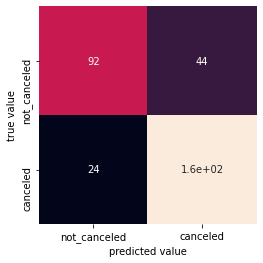

In [24]:
show_confusion_matrix(RandomForestClassifier(**study_randomforest.best_params))

## Naive Bayes

In [14]:
with mlflow.start_run():
    
    model = GaussianNB()
    model.fit(Xtrain, ytrain)
    ypred_train = model.predict(Xtrain)
    y_model = model.predict(Xtest)


    mlflow.log_metric('acc', accuracy_score(ytest, y_model))

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model registry does not work with file store
    if tracking_url_type_store != "file":

        # Register the model
        # There are other ways to use the Model Registry, which depends on the use case,
        # please refer to the doc for more information:
        # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        mlflow.sklearn.log_model(model, "model", registered_model_name="NaiveBayes")
    else:
        mlflow.sklearn.log_model(model, "model")

ACC TRAINING:0.6583850931677019
ACC TEST:0.6521739130434783


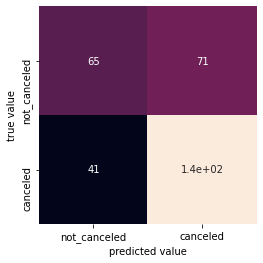

In [25]:
show_confusion_matrix(GaussianNB())

## Decision Tree

In [15]:
with mlflow.start_run():
    def objective(trial):
        # hyperparameter setting
        max_depth = trial.suggest_int('max_depth', 3, 1000)
        random_state = trial.suggest_int('max_depth', 0, 1000)
        
        # model training and evaluation
        model = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
        model.fit(Xtrain, ytrain)
        y_pred = model.predict(Xtest)
        acc = accuracy_score(ytest, y_pred)

        # output: evaluation score
        return acc

    study_decisiontree = optuna.create_study(direction='maximize')
    study_decisiontree.optimize(objective, n_trials=20)

    mlflow.log_param('max_depth', study_decisiontree.best_params['max_depth'])
    mlflow.log_metric('acc',study_decisiontree.best_value)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model registry does not work with file store
    if tracking_url_type_store != "file":

        # Register the model
        # There are other ways to use the Model Registry, which depends on the use case,
        # please refer to the doc for more information:
        # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        mlflow.sklearn.log_model(model, "model", registered_model_name="DecisionTree")
    else:
        mlflow.sklearn.log_model(model, "model")

[I 2020-11-15 22:52:04,732] A new study created in memory with name: no-name-1b3e60d2-40e7-41e4-8292-ff4ab2b87331
[I 2020-11-15 22:52:04,748] Trial 0 finished with value: 0.7142857142857143 and parameters: {'max_depth': 78}. Best is trial 0 with value: 0.7142857142857143.
[I 2020-11-15 22:52:04,767] Trial 1 finished with value: 0.7329192546583851 and parameters: {'max_depth': 966}. Best is trial 1 with value: 0.7329192546583851.
[I 2020-11-15 22:52:04,791] Trial 2 finished with value: 0.7204968944099379 and parameters: {'max_depth': 174}. Best is trial 1 with value: 0.7329192546583851.
[I 2020-11-15 22:52:04,810] Trial 3 finished with value: 0.7204968944099379 and parameters: {'max_depth': 153}. Best is trial 1 with value: 0.7329192546583851.
[I 2020-11-15 22:52:04,829] Trial 4 finished with value: 0.7391304347826086 and parameters: {'max_depth': 947}. Best is trial 4 with value: 0.7391304347826086.
[I 2020-11-15 22:52:04,843] Trial 5 finished with value: 0.7142857142857143 and paramet

ACC TRAINING:1.0
ACC TEST:0.7111801242236024


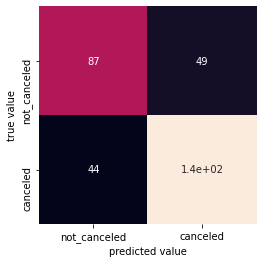

In [27]:
show_confusion_matrix(sklearn.tree.DecisionTreeClassifier(**study_decisiontree.best_params))